
<h1> <center> ENSF 519.01 Applied Data Scince </center></h1>
<h2> <center> Term Test - Oct 23, 2019 </center></h2>
<h2> <center> 100 marks - 2 hours </center></h2>


`Your Full Name:` James Peralta

`Your Student ID:` 30010233

# Question 1 (30 pts)

To answer this question you need to use a text file called `medium.txt`, which contains a number of articles from the medium.com website. In this question, you will first find all the `numbers` in the text, then check the distribution of `last digits` of the the numbers, over the text. Complete the code below to implement the following tasks:

1. Read the whole text file into a single string.
2. Use a regular expression to find all the numbers (numbers may have "," like 100,000 or fraction like 13.5. you keep a clean version without comma and drop the fraction and decimal point like 100000 and 13 for the example above.
3. Use `map` and a proper `lambda` expression to extract all the `last digits` (the rightmost digit) of all numbers as a list of integers. To give you an example, after applying the `map` on `['168', '54', '1000', '89']` you should get back `[8, 4, 0, 9]`. Note the data types!
4. Use proper numpy methods to count number of occurences of each digit.
5. Plot a bar chart showing how many numbers end with each digit.

{'0': 2462, '1': 1295, '2': 1221, '3': 819, '4': 779, '5': 678, '6': 504, '7': 432, '8': 548, '9': 334}


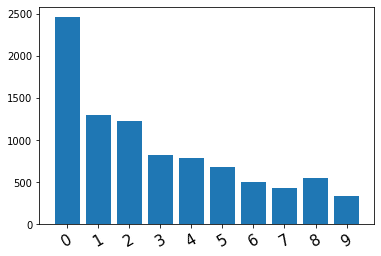

In [45]:
import re
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

def read_file(filename):
    """
    Open and read the contents of the given file. 
    Return the contents as a string. 
    Don't forget to properly close the file.
    """
    medium_file = open(filename, "r")
    medium_text = medium_file.read()
    medium_file.close()
    
    return medium_text

def find_all_numbers(text):
    """
    Using a regular expression find all the numbers in the given text
    """
    all_numbers = re.findall("([0-9]+[.,0-9]*)", text)
    remove_all_commas = list(map(lambda word: re.sub("[,]", "", word), all_numbers))
    remove_decimals = list(map(lambda word: word.split(".")[0], remove_all_commas))
    return remove_decimals

def get_last_digits(numbers_list):
    """ 
    Use `map` to get a list of rightmost digits in the input list. 
    Input type is a list of strings, the output should be a list of ints.
    """
    right_most = list(map(lambda word: word[-1], numbers_list))
    return right_most
    
def count_digits_in_list(l):
    """
    Use proper numpy methods for counting the frequency of each item in the input list.
    If the list is something like [2, 4, 4, 4, 6, 6, 6, 6, 6], the output will be something like:
    {2: 1, 4: 3, 6: 5}, but not necesserily as a dictionary, though. You're free to return the results in 
    any data format that suits your solution.
    """
    digits, counts = np.unique(l, return_counts=True)
    print(dict(zip(digits, counts)))
    return dict(zip(digits, counts))

def plot_bar_chart(last_digit_counts):
    """
    The input has the same type as the output of count_digits_in_list. No return statement is necessary.
    """
    index = np.arange(len(last_digit_counts.keys()))
    plt.bar(index, list(last_digit_counts.values()))
    plt.xticks(index, list(last_digit_counts.keys()), fontsize=15, rotation=30)
    pass
    

text = read_file('medium.txt')
all_numbers = find_all_numbers(text)
last_digits = get_last_digits(all_numbers)
last_digit_counts = count_digits_in_list(last_digits)
plot_bar_chart(last_digit_counts)

# Question 2 (40 pts)

Best non-fiction books of 2018 based on the good reads users votes can be found on this page: https://www.goodreads.com/choiceawards/best-nonfiction-books-2018

1. Here is the code that downloadds the page html content and makes a beautiful soup parser on it. Note that we have copied the file in a different domain to avoid potential IP blocking.


In [37]:
import requests
from bs4 import BeautifulSoup
import re

page_html = requests.get('https://sea-lab.github.io/best-nonfiction-books-2018.html').text
parser = BeautifulSoup(page_html, 'html.parser')

1. There are 20 blocks in the page showing the top 20 nominated books in the category. Find them using beautiful soup and loop over them to find:
    1. The number of votes using RegEx, don't forget to convert it to an `int`.
    2. Name of the book
    3. The author name
2. Store these three pieces of information in a pandas dataframe
3. Add a column to the dataframe that stores the genre. The code that extracts the genre name from the page is already included.

In [124]:
def extract_books_info(parser):
    """
    Get the page parser and find all the books
    """
    
    book_list = []
    
    # Get each book
    poll_contents = parser.find("div", class_="pollContents")
    results = poll_contents.find_all("div", class_="inlineblock pollAnswer resultShown")
    results1 = poll_contents.find_all("div", class_="inlineblock pollAnswer resultShown pollAnswer--last")
    
    combined = results + results1
    
    for movie in combined:
        book = {}
        
        # Get votes
        ui_text = movie.find("strong", class_="uitext result")
        votes = re.findall("([0-9]+[.,0-9]*)", ui_text.text)
        vote_string = votes[0]
        vote_string = vote_string.replace(",", "")
        
        # get name of the book
        book_name = movie.find("img").attrs["alt"]
        book_name = book_name.split(" by ")

        genre_name = parser.find('div', class_='gcaMastheader').get_text()[len('Best '):]
        
        book["votes"] = int(vote_string)
        book["name"] = book_name[0] 
        book["author"] = book_name[1]
        book["genre"] = genre_name
        
        book_list.append(book)
    
    
    return pd.DataFrame(book_list)

nonfiction = extract_books_info(parser)
nonfiction

,votes,name,author,genre
0,46472,I'll Be Gone in the Dark,Michelle McNamara,Nonfiction
1,40383,"Girl, Wash Your Face",Rachel Hollis,Nonfiction
2,26803,Fear,Bob Woodward,Nonfiction
3,19857,The Library Book,Susan Orlean,Nonfiction
4,16541,21 Lessons for the 21st Century,Yuval Noah Harari,Nonfiction
5,16043,Not That Bad,Roxane Gay,Nonfiction
6,11707,12 Rules for Life,Jordan B. Peterson,Nonfiction
7,9668,Factfulness,Hans Rosling,Nonfiction
8,4609,Bad Blood,John Carreyrou,Nonfiction
9,4084,All-American Murder,James Patterson,Nonfiction


Now read a similar dataframe from a csv file (fiction_books.csv) for top 20 fiction books. Then

1. Append the dataframes together (the result will have the same 4 columns, and 40 rows - and indexed from 0 to 39)

2. Sort it by #votes

In [127]:
combined = pd.read_csv("fiction_books.csv")
combined

,Title,Author,Votes,Genre
0,Still Me,Jojo Moyes,55300,Fiction
1,An American Marriage,Tayari Jones,41826,Fiction
2,Us Against You,Fredrik Backman,38981,Fiction
3,Nine Perfect Strangers,Liane Moriarty,31447,Fiction
4,An Absolutely Remarkable Thing,Hank Green,24363,Fiction
5,Killing Commendatore,Haruki Murakami,23695,Fiction
6,There There,Tommy Orange,18614,Fiction
7,Girls Burn Brighter,Shobha Rao,17854,Fiction
8,All We Ever Wanted,Emily Giffin,17490,Fiction
9,Every Note Played,Lisa Genova,15427,Fiction


Using pandas `groupby` and aggregation on the combined dataframe find the total number of votes for each genre. Then plot a bar chart with just two columns showing the number of votes for each genre.

In [132]:
nonfiction.groupby("genre")["votes"].sum()
combined.groupby("Genre")["Votes"].sum()

Genre
Fiction    326514
Name: Votes, dtype: int64

# Question 3 (30 pts)


Read the attached csv file (auto-mpg-cleaned.csv) that contains information about a number of car models. Split it into features and target columns. The target column is `mpg` and there are 7 features.

In [52]:
# Your code
source_file = 'auto-mpg-cleaned.csv'
data =  pd.read_csv(source_file)

features = data.drop(columns=["mpg"])
target = data["mpg"]

print(target.shape)  # Expected (392, 1)
features

(392,)


,Unnamed: 0,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
387,393,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
388,394,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
389,395,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
390,396,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


Apply a linear regresson model 50 times each with a different train-test split (test_size=0.25, random states: [1, 50)). Report the average score on the training and test sets, over these 50 models.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_scores = []
test_scores = []
for i in range(1, 51):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=i, test_size=0.25)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    training_score = lin_reg.score(X_train, y_train)
    train_scores.append(training_score)
    test_score = lin_reg.score(X_test, y_test)
    test_scores.append(test_score)
    
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8246212181387351
0.8060266788419476


Now apply a Lasso regularizatoin with 7 values of alpha: `[0.001, 0.01, 0.1, 1.0, 10., 100., 1000.]`. For each alpha use integers in [1, 50) as the train-test split's random state. Report the average score on the training and test sets per alpha. Explain where the sweet spot is with respect to over-fitting and under-fitting tradeoff.

In [59]:
from sklearn.linear_model import Lasso

for alpha in [0.001, 0.01, 0.1, 1.0, 10., 100., 1000.]:
    train_scores = []
    test_scores = []
    for i in range(1, 51):
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=i, test_size=0.25)

        lasso = Lasso(alpha=alpha).fit(X_train, y_train)
        training_score = lasso.score(X_train, y_train)
        train_scores.append(training_score)
        test_score = lasso.score(X_test, y_test)
        test_scores.append(test_score)
    
    train_mean_score = np.mean(train_scores)
    test_mean_score = np.mean(test_scores)
    print(f'LA ⍺={alpha:.5}\tTrain={train_mean_score:.6}\tTest={test_mean_score:.6}')

/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1432.3997836854762, tolerance: 1.6823486292517003
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1506.2754877756856, tolerance: 1.845649159863946
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1428.450930832516, tolerance: 1.7611499455782313
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: Convergenc

/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1585.557667434208, tolerance: 1.7741010884353738
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1516.0654513422144, tolerance: 1.857640802721089
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1416.0016654313204, tolerance: 1.7785710918367343
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: Convergenc

LA ⍺=0.001	Train=0.824621	Test=0.806036


/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 655.8920379329825, tolerance: 1.781122
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587.2560444985202, tolerance: 1.7205345170068027
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 584.3088576909581, tolerance: 1.7732956632653067
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: O

LA ⍺=0.01	Train=0.824584	Test=0.806082


/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9625114953132652, tolerance: 1.808700353741496
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5241701760960495, tolerance: 1.8350143673469386
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.766267397380489, tolerance: 1.679224017006803
  positive)
/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: Convergenc

LA ⍺=0.1	Train=0.82155	Test=0.804432
LA ⍺=1.0	Train=0.807383	Test=0.796488
LA ⍺=10.0	Train=0.80649	Test=0.798544
LA ⍺=100.0	Train=0.793377	Test=0.785495
LA ⍺=1000.0	Train=0.669238	Test=0.663585


In [4]:
# explain your answer here:
⍺=0.1 is the sweetspot is 0.1 where it hasn't overfit on the training set to much and can still get
good accuracy on the test set